<a href="https://colab.research.google.com/github/Mahnazshamissa/Python/blob/main/GermanCredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.svm import SVC

df_raw= pd.read_csv('/content/GermanCredit.csv', header=None)
df_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


In [5]:
df.dtypes

A11     object
6        int64
A34     object
A43     object
1169     int64
A65     object
A75     object
4        int64
A93     object
A101    object
4.1      int64
A121    object
67       int64
A143    object
A152    object
2        int64
A173    object
1        int64
A192    object
A201    object
1.1      int64
dtype: object

In [5]:
print(df_raw[20].value_counts())
print(df_raw[8].value_counts())

1    700
2    300
Name: 20, dtype: int64
A93    548
A92    310
A94     92
A91     50
Name: 8, dtype: int64


In [7]:
# create gender column
male = ['A91','A93','A94']
female = ['A92','A95']
partner = ['A91','A92','A94']
single = ['A95','A93']

df_raw['gender']=df_raw[8]
df_raw.loc[df_raw[8].isin(male),'gender']= 0
df_raw.loc[df_raw[8].isin(female),'gender']= 1

df_raw['material']=df_raw[8]
df_raw.loc[df_raw[8].isin(partner),'material']= 0
df_raw.loc[df_raw[8].isin(single),'material']= 1

df= df_raw.copy()

In [8]:
#convert the categorical columns into numeric
dictClasses={}
le = LabelEncoder()
for el in df.columns:
  if df[el].dtype == 'object':
     df[el]=le.fit_transform(df[el])
     print(le.classes_)
     dictClasses[el] = le.classes_.flatten()


['A11' 'A12' 'A13' 'A14']
['A30' 'A31' 'A32' 'A33' 'A34']
['A40' 'A41' 'A410' 'A42' 'A43' 'A44' 'A45' 'A46' 'A48' 'A49']
['A61' 'A62' 'A63' 'A64' 'A65']
['A71' 'A72' 'A73' 'A74' 'A75']
['A91' 'A92' 'A93' 'A94']
['A101' 'A102' 'A103']
['A121' 'A122' 'A123' 'A124']
['A141' 'A142' 'A143']
['A151' 'A152' 'A153']
['A171' 'A172' 'A173' 'A174']
['A191' 'A192']
['A201' 'A202']
[0 1]
[0 1]


In [9]:
# split label column from the rest
X = df.copy().drop(columns=20)
y = df.copy()[20]

In [11]:
#%% apply standardScaler to X
X = StandardScaler().fit_transform(X)

In [12]:
#%% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True)

In [13]:
#%% use SVC model
## TODO: class weights
lsvc = SVC(max_iter=10000,tol=0.00001)
lsvc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=10000, probability=False, random_state=None, shrinking=True,
    tol=1e-05, verbose=False)

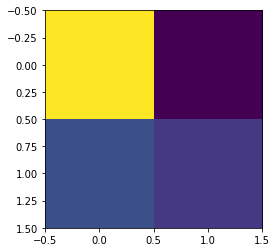

In [15]:
#%% validate, just visualize the confussion matrix and some general scores
y_pred = lsvc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plt.imshow(cm);

In [16]:
#%%
tn, fp, fn, tp = cm.ravel()
print("calculated accuracy score: ",accuracy_score(y_test,y_pred))
print("\n of a total %d test samples" % y_test.size)
print("\t true positives: %d " % tp)
print("\t true negatives: %d " % tn)
print("\t false positives: %d " % fp)
print("\t false negatives: %d " % fn)
acc = (tp + tn) / y_test.size
recall = tp/(tp + fn)
fpr = fp/(fp + tn)
prec = tp/(tp + fp)
print("\n\t accuracy: %f" % acc)
print("\t recall (sensitivity): %f" % recall)
print("\t fpr (specificity): %f" % fpr)
print("\t precision: %f" % prec)

calculated accuracy score:  0.77

 of a total 300 test samples
	 true positives: 42 
	 true negatives: 189 
	 false positives: 13 
	 false negatives: 56 

	 accuracy: 0.770000
	 recall (sensitivity): 0.428571
	 fpr (specificity): 0.064356
	 precision: 0.763636
